# 1. Data Loading and Overview

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Import a dataset into pandas dataframe
url=r'C:\Users\gruba\OneDrive\Pulpit\supermarket_sales.csv'
df=pd.read_csv(url)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
# Check size of the dataframe
df.shape

(1000, 17)

In [14]:
# Print statistical summary of the df
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [41]:
# Check if there are missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [37]:
# Check if data types are correct
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [47]:
# Convert data types into appropriate format
df['Date']=pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [47]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [49]:
# Check if there are duplicate rows or columns
df.duplicated().sum()

0

# 2. Sales Performance Analysis

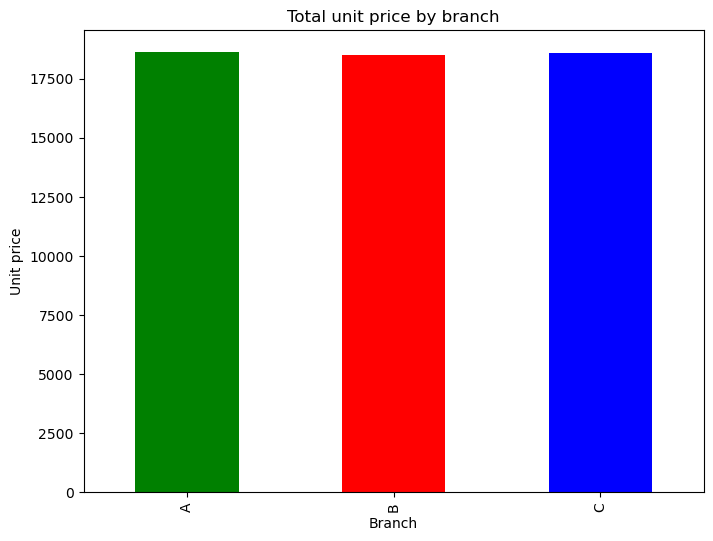

In [61]:
branches = df.groupby('Branch')['Unit price'].sum()
branches.plot(kind='bar', color=['green','red','blue'], figsize=(8,6))

plt.title('Total unit price by branch')
plt.xlabel('Branch')
plt.ylabel('Unit price')
plt.show()

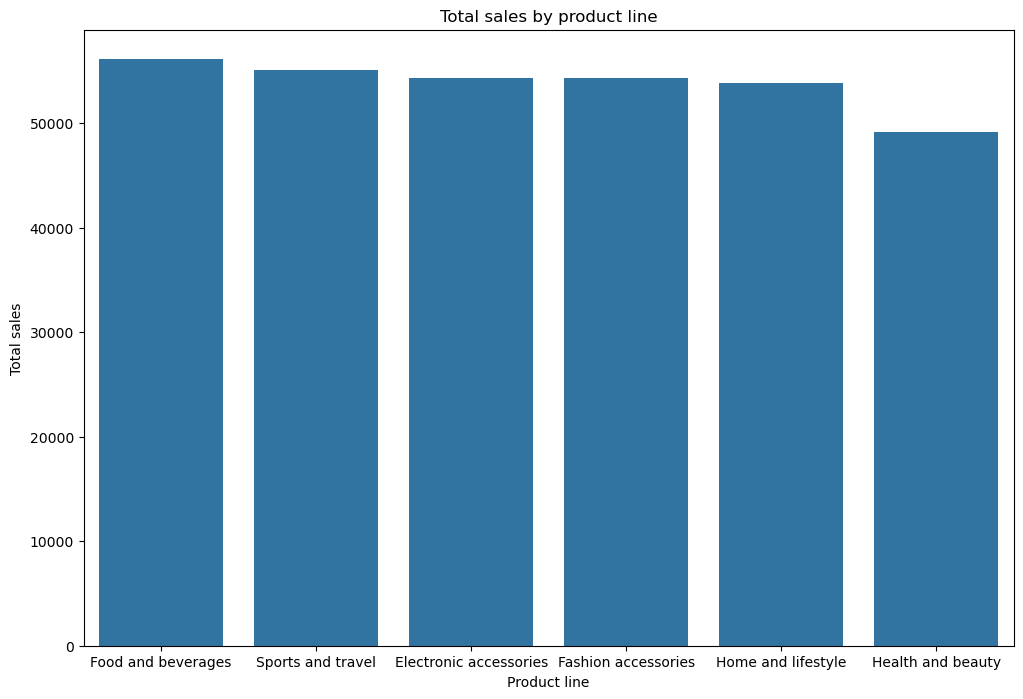

In [73]:
sales_by_product = df.groupby('Product line')['Total'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='Total', ascending = False)

plt.figure(figsize=(12,8))
sns.barplot(x='Product line', y='Total', data=sales_by_product)
plt.title('Total sales by product line')
plt.xlabel('Product line')
plt.ylabel('Total sales')
plt.show()

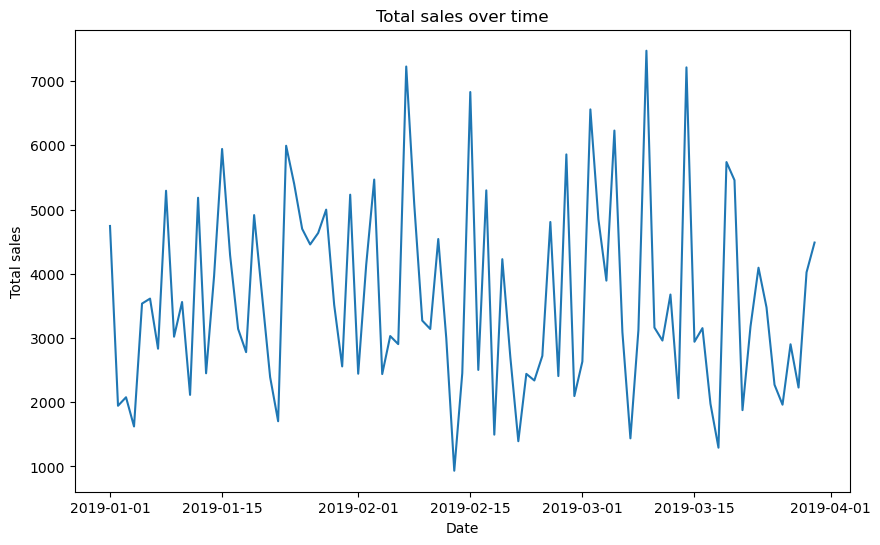

In [81]:
sales_over_time = df.groupby('Date')['Total'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=sales_over_time, x='Date', y='Total')
plt.title('')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.show()

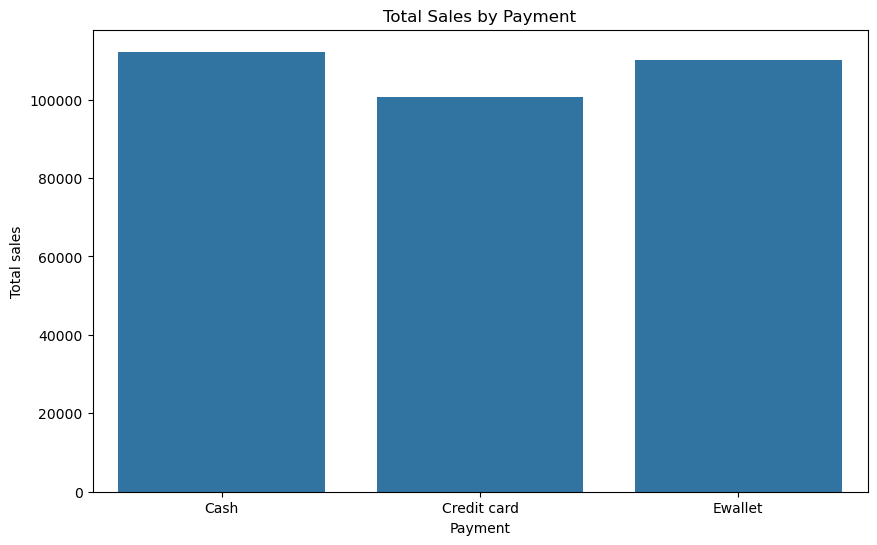

In [49]:
sales_by_payment = df.groupby('Payment')['Total'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_payment, x='Payment', y='Total')
plt.title('Total Sales by Payment')
plt.xlabel('Payment')
plt.ylabel('Total sales')
plt.show()

# 3. Customer Behavior Analysis

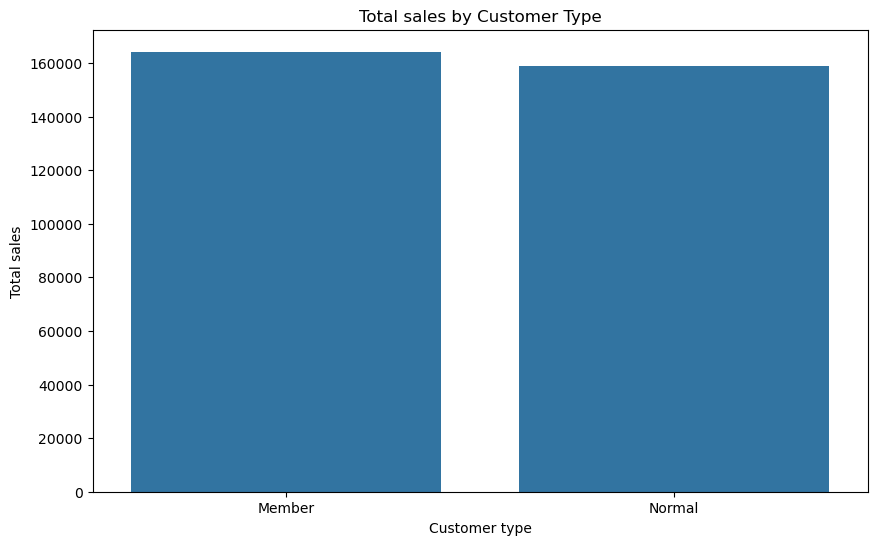

In [51]:
sales_by_ctype = df.groupby('Customer type')['Total'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_ctype, x='Customer type', y='Total')
plt.title('Total sales by Customer Type')
plt.xlabel('Customer type')
plt.ylabel('Total sales')
plt.show()

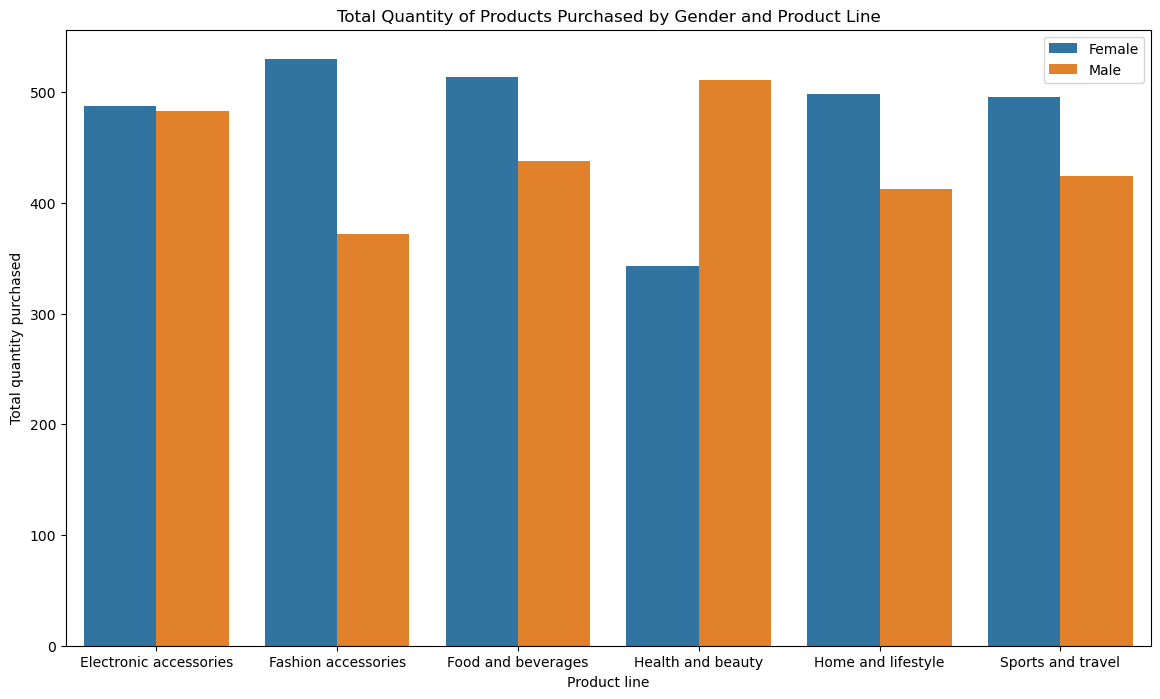

In [53]:
gender_product_sales = df.groupby(['Gender','Product line'])['Quantity'].sum().reset_index()
gender_product_pivot = gender_product_sales.pivot(index='Product line', columns='Gender', values='Quantity')

plt.figure(figsize=(14,8))
sns.barplot(x='Product line', y='Quantity', hue='Gender', data=gender_product_sales)
plt.title('Total Quantity of Products Purchased by Gender and Product Line')
plt.xlabel('Product line')
plt.ylabel('Total quantity purchased')
plt.legend()
plt.show()

C:\Users\gruba\AppData\Local\Temp\ipykernel_6184\2123374777.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Rating', data=avg_rating_by_branch, palette='viridis', ax=axes[1])
C:\Users\gruba\AppData\Local\Temp\ipykernel_6184\2123374777.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Rating', data=avg_rating_by_product, palette='coolwarm', ax=axes[2])


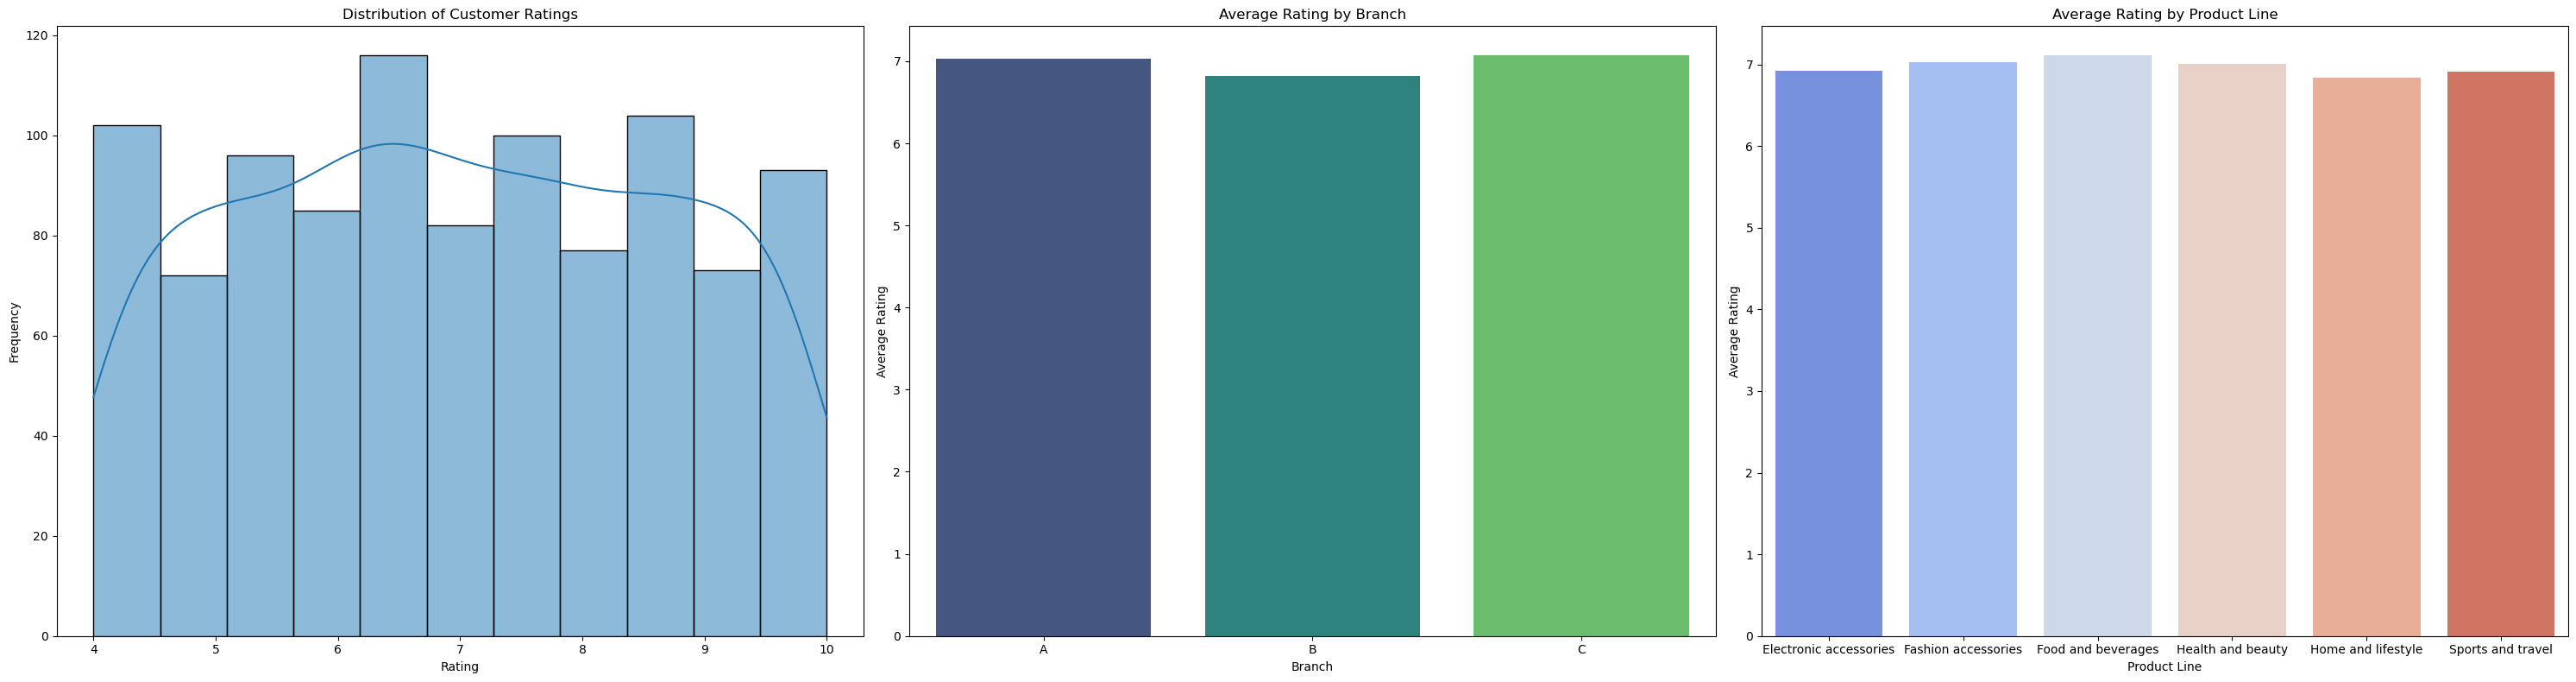

In [118]:
avg_rating_by_branch = df.groupby('Branch')['Rating'].mean().reset_index()
avg_rating_by_product = df.groupby('Product line')['Rating'].mean().reset_index()

fig, axes = plt.subplots(1,3, figsize=(30,8))

sns.histplot(df['Rating'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Customer Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')

sns.barplot(x='Branch', y='Rating', data=avg_rating_by_branch, palette='viridis', ax=axes[1])
axes[1].set_title('Average Rating by Branch')
axes[1].set_xlabel('Branch')
axes[1].set_ylabel('Average Rating')

sns.barplot(x='Product line', y='Rating', data=avg_rating_by_product, palette='coolwarm', ax=axes[2])
axes[2].set_title('Average Rating by Product Line')
axes[2].set_xlabel('Product Line')
axes[2].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()

# 4.Cities Analysis

C:\Users\gruba\AppData\Local\Temp\ipykernel_25348\2050485738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_cities, x='Total', y='City', palette='deep')


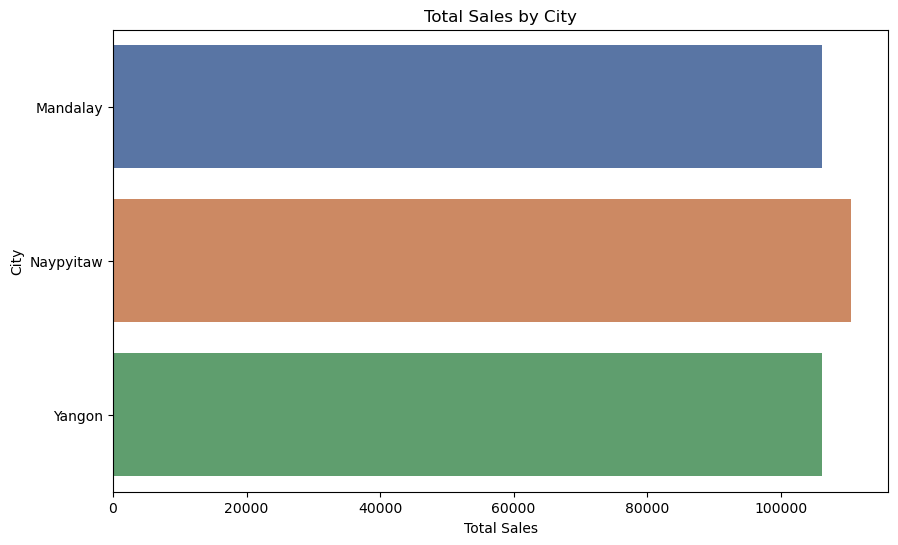

In [55]:
sales_by_cities=df.groupby('City')['Total'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_cities, x='Total', y='City', palette='deep')
plt.title('Total Sales by City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

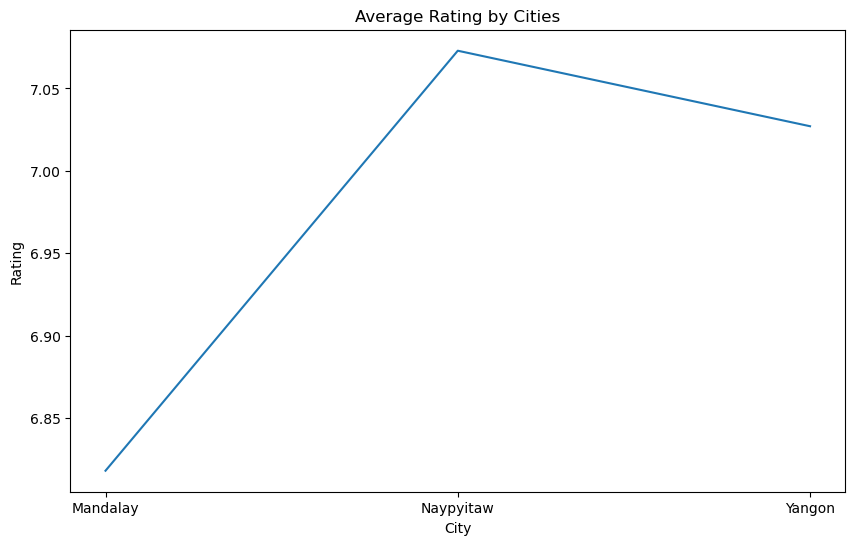

In [30]:
avg_rating_by_cities=df.groupby('City')['Rating'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='City', y='Rating', data=avg_rating_by_cities)
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Average Rating by Cities')
plt.show()

# 5. Encoding Categorical Variables

In [34]:
df['Customer type'] = df['Customer type'].map({'Member': 1, 'Normal': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [36]:
df = pd.get_dummies(df, columns=["Branch"], drop_first=True)
df = pd.get_dummies(df, columns=["City"], drop_first=True)
df = pd.get_dummies(df, columns=["Product line"], drop_first=True)
df = pd.get_dummies(df, columns=["Payment"], drop_first=True)

In [38]:
df.head()

,Invoice ID,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,...,Branch_C,City_Naypyitaw,City_Yangon,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,750-67-8428,1,0,74.69,7,26.1415,548.9715,1/5/2019,13:08,522.83,...,False,False,True,False,False,True,False,False,False,True
1,226-31-3081,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,76.40,...,True,True,False,False,False,False,False,False,False,False
2,631-41-3108,0,1,46.33,7,16.2155,340.5255,3/3/2019,13:23,324.31,...,False,False,True,False,False,False,True,False,True,False
3,123-19-1176,1,1,58.22,8,23.2880,489.0480,1/27/2019,20:33,465.76,...,False,False,True,False,False,True,False,False,False,True
4,373-73-7910,0,1,86.31,7,30.2085,634.3785,2/8/2019,10:37,604.17,...,False,False,True,False,False,False,False,True,False,True


# 6. Correlation Matrix Analysis

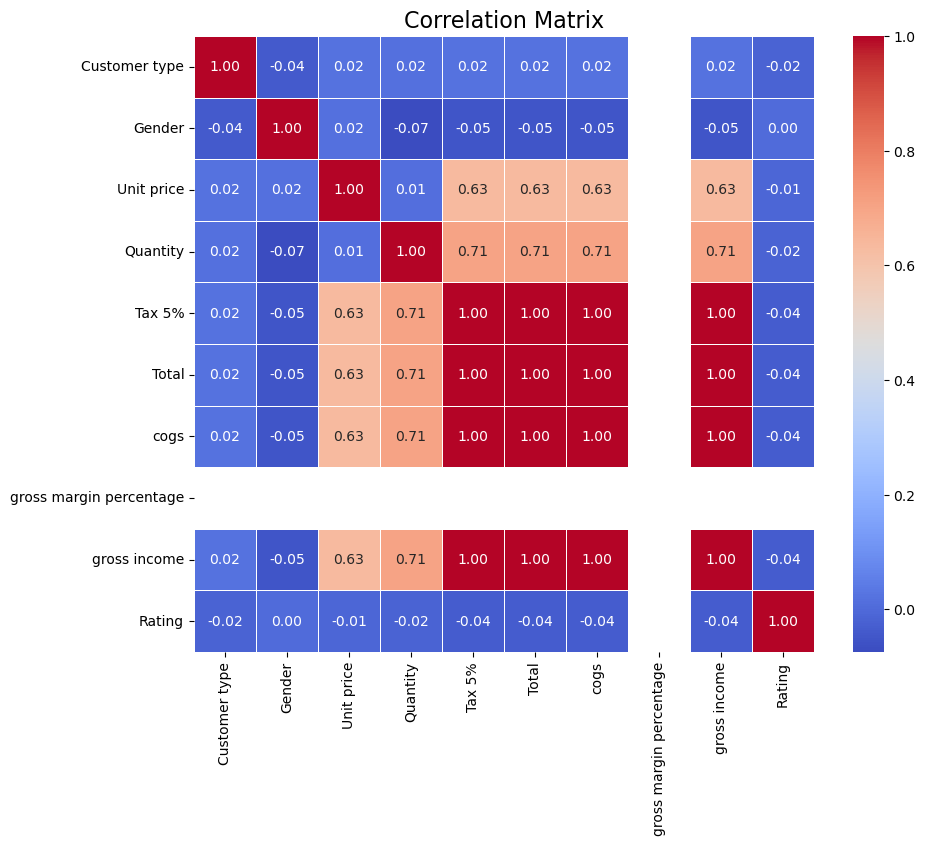

In [41]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()